![Logo](../visualisations/logos/banner_colibri.png)

---
# 🏝️ Welcome to **colibri**'s playground!

Here, you will be able to test all the features of the package. Adapt parameters and run the cells corresponding to the function you want to test to see the result. Make sure you activate the conda environment `colibri` and the Jupyter kernel before starting. A quick description of the functionalities is provided. More technical information is available in docstrings of each function.

---
<br/>
<br/>

In [1]:
# Import colibri

import sys

sys.path.append("..")
import src


<br/>

**0. Set up your umbrella review** <br/>
Choose the scientific field you want to sythesise by setting up a search query. Select the platforms from which you want to get publications from.<br/>
*Nota bene:*
- *only scientific field studying Soil Organic Carbon is currently available*
- *only Web of Science platform is currently available*

In [2]:
search_query = "ts = (('meta*analysis' or 'systematic review') and ('soil organic carbon' or 'SOC' or 'soil organic matter' or 'SOM' or 'soil carbon'))"
platforms = ["WoS"]


<br/>

**1. Run the entire pipeline** <br/>
From scrapping publications to characterising their content. More details in README.md file.

In [ ]:
src.wrapper.run_pipeline(search_query, platforms)

<br/>

**2. Scrapping** <br/>
Scrape publications on various platform with a specific search query. DOIs, titles, abstracts and keywords (when available) of each publication will be stored in Pickle files in folder `colibri/data/<yyyy>-<mm>-<dd>_<hh>-<mm>-<ss>` with the corresponding timestamp of your scrapping.

In [ ]:
src.scrapper.scrape(search_query, platforms)

<br/>

**3. Scrapping statistics** <br/>
Visualise the number of papers scrapped over time given the specific search query and platforms. The graph is stored in `colibri/visualisations/scrapping_over_time.png` file.

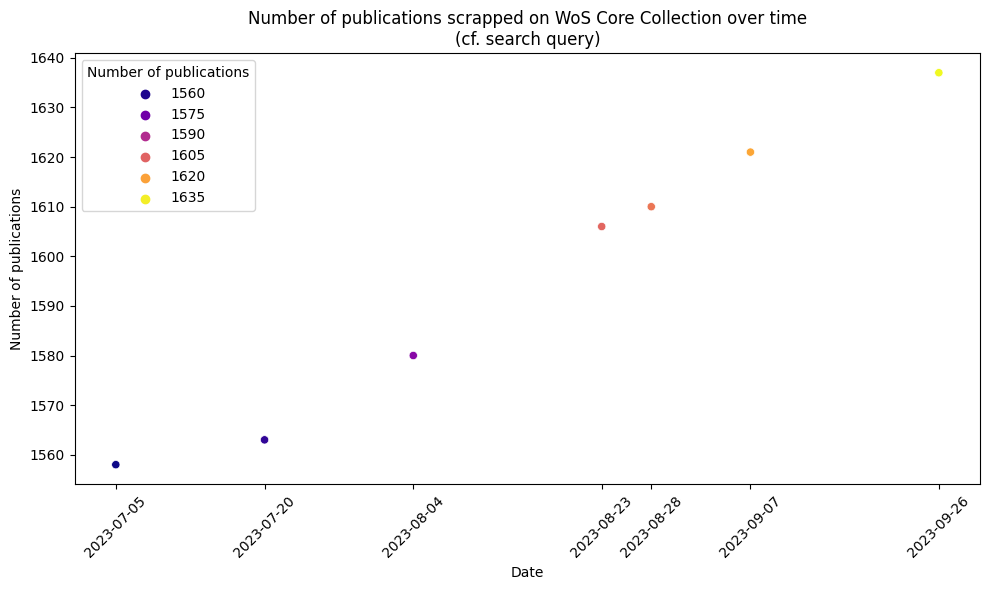

In [3]:
src.scrapper.scrapping_over_time()

<br/>

**4. Fine-tuning of the classification model** <br/>
Fine-tune the DistilBERT model and save the weights in `colibri/data/distilbert_runs/<yyyy>-<mm>-<dd>_<hh>-<mm>-<ss>/fine_tuned_model.pt` file.

In [ ]:
config = {
    "epochs": 50,
    "batch_size": 32,
    "learning_rate": 1e-3,
    "dropout": 0.3,
    "padding_length": 100,
    "testset_size": 0.2,
    "distilbert_trainset_path": "/home/er/Documents/Cirad/colibri/data/distilbert_trainset/trainset.pkl",
}

src.filter.train_distilbert(config)